# Part 3

## Pre-processing

In [130]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

import numpy as np

import os
import shutil

import matplotlib.pyplot as plt

import random

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [131]:
# Set the source and new folder paths
src_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch"
train_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch/train"
val_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch/val"
test_folder = "C:/Users/Sankalp/Desktop/UB/Academics/Sem 2/Intro to ML/Assignment 2/cnn_dataset_torch/test"

# Set categories
categories = ['dogs', 'food', 'vehicles']
print(categories)


['dogs', 'food', 'vehicles']


In [133]:
# Create the new folders
os.mkdir(train_folder)
os.mkdir(val_folder)
os.mkdir(test_folder)
for category in categories:
    os.mkdir(f"{train_folder}/{category}")
    os.mkdir(f"{val_folder}/{category}")
    os.mkdir(f"{test_folder}/{category}")

# Prepare the train set folder with 8000 images of each category
image_files = [f"{i}.jpg" for i in range(1, 8001)]
for category in categories:
    for filename in image_files:
        src_path = os.path.join(f"{src_folder}\{category}", filename)
        dst_path = os.path.join(f"{train_folder}\{category}", filename)
        shutil.copy(src_path, dst_path)

# Prepare the validation set folder with 1000 images of each category
image_files = [f"{i}.jpg" for i in range(8001, 9001)]
for category in categories:
    for filename in image_files:
        src_path = os.path.join(f"{src_folder}\{category}", filename)
        dst_path = os.path.join(f"{val_folder}\{category}", filename)
        shutil.copy(src_path, dst_path)

# Prepare the test set folder with 1000 images of each category
image_files = [f"{i}.jpg" for i in range(9001, 10001)]
for category in categories:
    for filename in image_files:
        src_path = os.path.join(f"{src_folder}\{category}", filename)
        dst_path = os.path.join(f"{test_folder}\{category}", filename)
        shutil.copy(src_path, dst_path)

# delete the original folders
for category in categories:
    shutil.rmtree(f"{src_folder}\{category}")

In [4]:
# Check composition of each folder
print(f"The training set consists of {len(os.listdir(train_folder + '/dogs/'))} dog images, {len(os.listdir(train_folder + '/food/'))} food images, and {len(os.listdir(train_folder + '/vehicles/'))} vehicle images.")
print(f"The validation set consists of {len(os.listdir(val_folder + '/dogs/'))} dog images, {len(os.listdir(val_folder + '/food/'))} food images, and {len(os.listdir(val_folder + '/vehicles/'))} vehicle images.")
print(f"The testing set consists of {len(os.listdir(test_folder + '/dogs/'))} dog images, {len(os.listdir(test_folder + '/food/'))} food images, and {len(os.listdir(test_folder + '/vehicles/'))} vehicle images.")

The training set consists of 8000 dog images, 8000 food images, and 8000 vehicle images.
The validation set consists of 1000 dog images, 1000 food images, and 1000 vehicle images.
The testing set consists of 1000 dog images, 1000 food images, and 1000 vehicle images.


In [199]:
# define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize(227),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    # transforms.Normalize(mean=[0.5031, 0.4499, 0.3866],
    #                      std=[0.2645, 0.2578, 0.2686])
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# load the training data
train_data = ImageFolder(train_folder, transform=transform)

# load the validation data
val_data = ImageFolder(val_folder, transform=transform)

# load the test data
test_data = ImageFolder(test_folder, transform=transform)

print(f"Training data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Testing data size: {len(test_data)}")


# # Compute the mean and standard deviation for each channel separately and use it to normalize the tensors.
# mean = [0, 0, 0]
# std = [0, 0, 0]
# for data, _ in train_data:
#     for i in range(3):
#         mean[i] += data[i,:,:].mean()
#         std[i] += data[i,:,:].std()

# print(f"len mean: {len(mean)}")

# # Compute the mean and standard deviation for the entire dataset
# mean = [m/len(train_data) for m in mean]
# std = [s/len(train_data) for s in std]

# # Print the mean and standard deviation values for each channel
# print('Mean:', mean)
# print('Std:', std)


Training data size: 24000
Validation data size: 3000
Testing data size: 3000


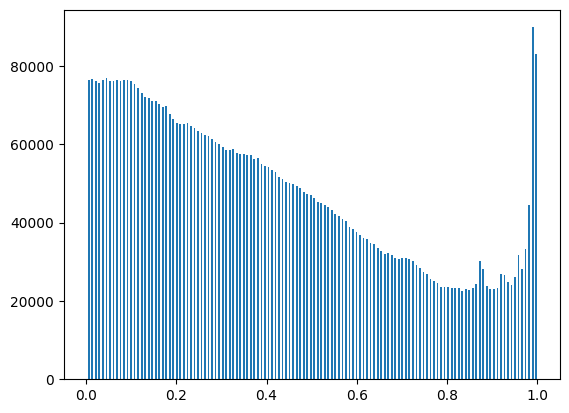

In [34]:
# Plot a histogram of pixel intensities

# Create a list to store the pixel intensities of all images
pixel_values = []

# Loop over 100 images in the dataset and extract the pixel values
for i, (images, _) in enumerate(train_data):
    # Flatten the images to 1D arrays
    pixels = images.numpy().ravel()
    # Append the pixel values to the list
    pixel_values.extend(pixels)

    if i >= 100:
        break

# Plot the histogram of pixel intensities
plt.hist(pixel_values, bins=256, range=(0, 1))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


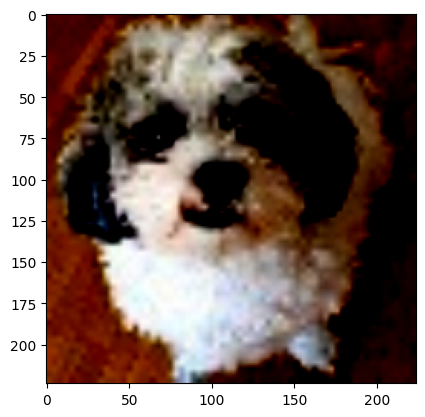

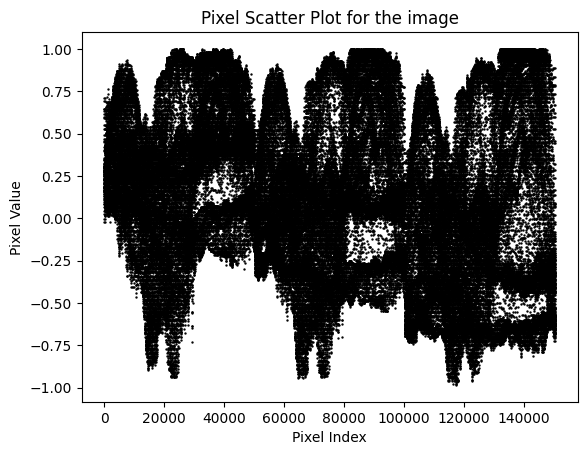

In [43]:
# Plot a scatter plot of pixels in a random image

# Choose an image from the dataset
img_idx = 0
img, _ = train_data[random.randrange(24000)]

# Convert the image tensor to a numpy array and plot the image
plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))
plt.show()

# Reshape the image to a 1D array
pixels = img.numpy().ravel()

# Plot the scatter plot of pixel values
plt.scatter(range(len(pixels)), pixels, s=0.5, c='black')
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Value")
plt.title("Pixel Scatter Plot for the image")
plt.show()

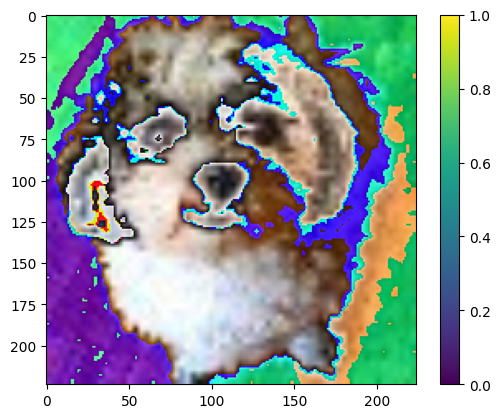

In [44]:
# Plot a heatmap of pixel values in an image

# Convert the image tensor to a numpy array and normalize it
img_array = np.array(transforms.ToPILImage()(img))
img_norm = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))

# Plot the heatmap of pixel values
plt.imshow(img_norm)
plt.colorbar()
plt.show()

In [200]:
# define the batch size
batch_size = 64

# create the training data loader
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# create the validation data loader
val_loader = DataLoader(val_data, batch_size=batch_size)

# create the test data loader
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

print(f"train_loader has {len(train_loader)} batches of {batch_size} images")
print(f"val_loader has {len(val_loader)} batches of {batch_size} images")
print(f"test_loader has {len(test_loader)} batches of {batch_size} images")

train_loader has 375 batches of 64 images
val_loader has 47 batches of 64 images
test_loader has 47 batches of 64 images


In [201]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=3):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            # Layer 1
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Layer 2
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Layer 3
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),

            # Layer 4
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),

            # Layer 5
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        # self.avgpool = nn.AdaptiveAvgPool2d((4, 4))
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            # FC 1
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU(),
            
            # FC 2
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),

            # FC 3
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Batch size: 64
Label count: 64

Image in batch: 

Image shape: torch.Size([3, 224, 224])
Channels: 3
Pixels in height: 224
Pixels in width: 224
Image: tensor([[-0.0431, -0.0431, -0.0431,  ..., -0.0039, -0.0118, -0.0118],
        [-0.0431, -0.0431, -0.0431,  ..., -0.0039, -0.0118, -0.0118],
        [-0.0431, -0.0431, -0.0431,  ..., -0.0039, -0.0118, -0.0118],
        ...,
        [ 0.0039,  0.0039, -0.0118,  ..., -0.2314, -0.2392, -0.2392],
        [-0.0196, -0.0196, -0.0353,  ..., -0.2549, -0.2627, -0.2627],
        [-0.0196, -0.0196, -0.0353,  ..., -0.2549, -0.2627, -0.2627]])
Label: 0



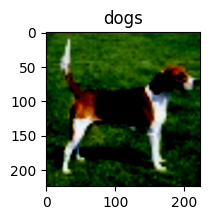

In [49]:
# Display a sample image
for batch, labels in train_loader:
    print(f"Batch size: {len(batch)}")
    print(f"Label count: {len(batch)}\n")

    sample_image = batch[0]
    
    print(f"Image in batch: \n")
    print(f"Image shape: {sample_image.shape}")
    print(f"Channels: {len(sample_image)}")
    print(f"Pixels in height: {len(sample_image[0])}")
    print(f"Pixels in width: {len(sample_image[0][0])}")
    
    print(f"Image: {sample_image[0]}")
    print(f"Label: {labels[0]}\n")

    img = np.transpose(sample_image, (1, 2, 0))
    plt.figure(figsize = (2,2))
    plt.imshow(img)
    plt.title(categories[labels[0]])
    plt.show()

    break
    

## Training

In [156]:
# Set the hyperparameters
num_classes = 3
num_epochs = 10
learning_rate = 0.01

# Create an instance of the model
model = AlexNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)

In [157]:
# Create lists to store the loss and accuracy for plotting later
train_loss = list()
train_acc = list()
val_loss = list()
val_acc = list()
train_steps = len(train_loader)
val_steps = len(val_loader)

print(f"Device: {device}")
print(f"Batch Size: {batch_size}")
print(f"Learning Rate: {learning_rate}")
print(f"Epochs: {num_epochs}\n")

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    
    # Set the model to training mode
    model.train()
    
    # Iterate over the training data
    for tidx, (images, labels) in enumerate(train_loader):
        
        # Move the inputs and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero-out the parameter gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)    # reduce dimension to 1
        loss = criterion(outputs, labels)
        
        # Perform backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate the running loss and the number of correct labels
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += images.size(0)
        
    # Calculate the training loss and accuracy
    epoch_loss = running_loss / len(train_data)
    epoch_acc = running_corrects.double() / len(train_data)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Turn off gradient computation for validation data
    with torch.no_grad():
        running_loss = 0.0
        running_corrects = 0
        total = 0
        
        for vidx, (images, labels) in enumerate(val_loader):
            
            # Mve the inputs and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)
            
            # Perform forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)    # reduce dimension to 1
            loss = criterion(outputs, labels)
            
            # Calculate the running loss and the number of correct labels
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += images.size(0)
        
        # Calculate the validation loss and accuracy
        epoch_loss = running_loss / len(val_data)
        epoch_acc = running_corrects.double() / len(val_data)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)
        
    # Print the epoch number, training loss and accuracy, and validation loss and accuracy
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Step [{tidx + 1}/{train_steps}], Validation Step [{vidx + 1}/{val_steps}]")
    print(f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}\n")


Device: cuda:0
Batch Size: 64
Learning Rate: 0.01
Epochs: 10

Epoch [1/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.4186, Train Acc: 0.8398, Val Loss: 0.4872, Val Acc: 0.8113

Epoch [2/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2893, Train Acc: 0.8947, Val Loss: 0.5271, Val Acc: 0.7533

Epoch [3/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2393, Train Acc: 0.9126, Val Loss: 0.2852, Val Acc: 0.8830

Epoch [4/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2091, Train Acc: 0.9229, Val Loss: 0.3262, Val Acc: 0.8747

Epoch [5/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1912, Train Acc: 0.9318, Val Loss: 0.2606, Val Acc: 0.9003

Epoch [6/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1667, Train Acc: 0.9406, Val Loss: 0.1995, Val Acc: 0.9210

Epoch [7/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1477, Train Acc: 0.9464, Val Loss: 0.1965, Val Acc: 0.9343



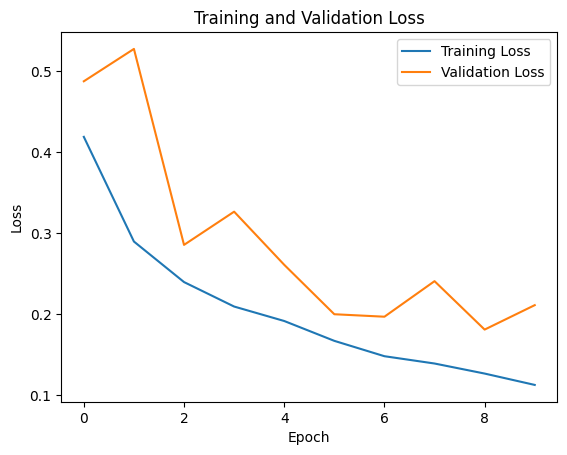

In [158]:
# Plot the training loss vs validation loss graph
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Testing

In [159]:
# Define a function to run the model on the test set

def test_model(model, test_loader):
    # Set the model to evaluation mode
    model.eval()

    # Create lists for predicted labels and true labels
    preds = list()
    labels = list()

    # Turn off gradient computation for testing data
    with torch.no_grad():
        for images, true_labels in test_loader:

            # Move the inputs and true labels to the GPU if available
            images = images.to(device)
            true_labels = true_labels.to(device)

            # Perform forward pass
            outputs = model(images)
            _, predicted_labels = torch.max(outputs, 1)    # reduce dimension to 1

            # Append the predicted and true labels to the lists
            # Since cuda:0 device type cannot be converted from tensor to numpy, we use Tensor.cpu() to copy the tensor to host memory first.
            preds.extend(predicted_labels.cpu().numpy())
            labels.extend(true_labels.cpu().numpy())

    return {
        'predicted': preds,
        'actual': labels,
        'acc': (np.array(preds) == np.array(labels)).mean()
    }


In [161]:
test_result = test_model(model, test_loader)

# Print the test accuracy
print(f"Test Accuracy: {(test_result['acc'] * 100):.2f}%")

Test Accuracy: 90.02%


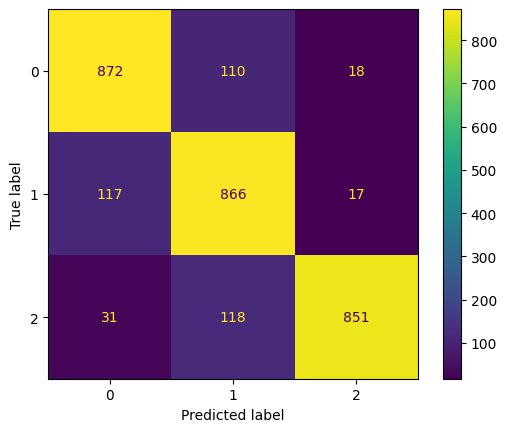

In [162]:
# Plot a confusion matrix
from sklearn import metrics

# Confusion matrix function 
confusion_matrix = metrics.confusion_matrix(test_result['actual'], test_result['predicted'])

# Convert the table into a confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Plot
cm_display.plot()
plt.show()


## Improvement techniques

Now, we will try some techniques and see how they impact the performance of our model.

### Learning Rate Scheduler

#### Training with a Learning Rate Scheduler

In [175]:
print(f"==================================    Training with lr scheduler    ==================================")

# Set the hyperparameters
num_classes = 3
num_epochs = 10
learning_rate = 0.01

# Create an instance of the model
model = AlexNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Create lists to store the loss and accuracy for plotting later
train_loss = list()
train_acc = list()
val_loss = list()
val_acc = list()
train_steps = len(train_loader)
val_steps = len(val_loader)
best_acc = 0.0

# Create a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

print(f"Device: {device}")
print(f"Batch Size: {batch_size}")
print(f"Learning Rate: {learning_rate}")
print(f"Epochs: {num_epochs}\n")

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    
    # Set the model to training mode
    model.train()
    
    # Iterate over the training data
    for tidx, (images, labels) in enumerate(train_loader):
        
        # Move the inputs and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero-out the parameter gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)    # reduce dimension to 1
        loss = criterion(outputs, labels)
        
        # Perform backward pass and optimization
        loss.backward()
        optimizer.step()

        # # Scheduler
        # lr_scheduler.step()
        
        # Calculate the running loss and the number of correct labels
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += images.size(0)
        
    # Calculate the training loss and accuracy
    epoch_loss = running_loss / len(train_data)
    epoch_acc = running_corrects.double() / len(train_data)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Turn off gradient computation for validation data
    with torch.no_grad():
        running_loss = 0.0
        running_corrects = 0
        total = 0
        
        for vidx, (images, labels) in enumerate(val_loader):
            
            # Mve the inputs and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)
            
            # Perform forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)    # reduce dimension to 1
            loss = criterion(outputs, labels)
            
            # Calculate the running loss and the number of correct labels
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += images.size(0)
        
        # Calculate the validation loss and accuracy
        epoch_loss = running_loss / len(val_data)
        epoch_acc = running_corrects.double() / len(val_data)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)

    # Decrease the learning rate using the learning scheduler
    lr_scheduler.step()

    # Save the best weights
    if val_acc[-1] > best_acc:
        best_acc = val_acc[-1]
        # Save the model's state dictionary to a file in .h5 format
        torch.save(model.state_dict(), 'sankalpm_ kedarama_assignment2_ part_2.h5')

    # Print the epoch number, steps, and losses and accuracies for training and validation
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Step [{tidx + 1}/{train_steps}], Validation Step [{vidx + 1}/{val_steps}]")
    print(f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}\n")


==================================    Training with lr scheduler    ==================================
Device: cuda:0
Batch Size: 64
Learning Rate: 0.01
Epochs: 10

Epoch [1/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.4131, Train Acc: 0.8437, Val Loss: 0.3831, Val Acc: 0.8363

Epoch [2/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2857, Train Acc: 0.8965, Val Loss: 0.2818, Val Acc: 0.8933

Epoch [3/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1987, Train Acc: 0.9268, Val Loss: 0.2558, Val Acc: 0.9027

Epoch [4/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1806, Train Acc: 0.9347, Val Loss: 0.2428, Val Acc: 0.9027

Epoch [5/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1635, Train Acc: 0.9396, Val Loss: 0.2163, Val Acc: 0.9153

Epoch [6/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1607, Train Acc: 0.9402, Val Loss: 0.2341, Val Acc: 0.9087

Epoch [7/10], Train Step [375/3

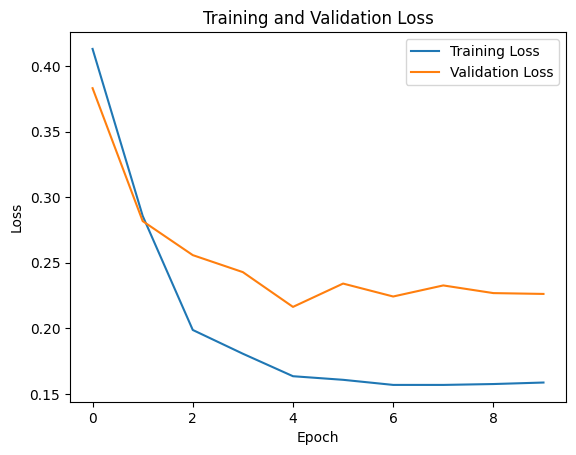

In [176]:
# Plot the training loss vs validation loss graph
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Testing  with a Learning Rate Scheduler

In [57]:
test_result = test_model(model, test_loader)

# Print the test accuracy
print(f"Test Accuracy: {(test_result['acc'] * 100):.2f}%")

Test Accuracy with a learning rate scheduler: 90.43%


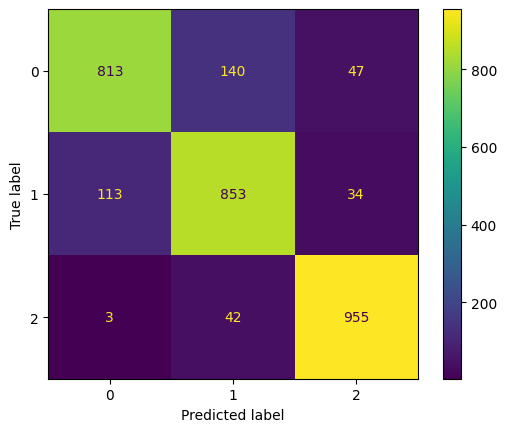

In [178]:
# Plot a confusion matrix

# Confusion matrix function 
confusion_matrix = metrics.confusion_matrix(test_result['actual'], test_result['predicted'])

# Convert the table into a confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Plot
cm_display.plot()
plt.show()

We can see a slight improvement in accuracy.

### Early Stopping

#### Training with Early Stopping

In [70]:
print(f"==================================    Training with early stopping    ==================================")

# Set the hyperparameters
num_classes = 3
num_epochs = 10
learning_rate = 0.01
patience = 3            # number of epochs to wait before stopping if validation accuracy does not improve

# Create an instance of the model
model = AlexNet(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)  

# Create lists to store the loss and accuracy for plotting later
train_loss = list()
train_acc = list()
val_loss = list()
val_acc = list()
train_steps = len(train_loader)
val_steps = len(val_loader)

print(f"Device: {device}")
print(f"Batch Size: {batch_size}")
print(f"Learning Rate: {learning_rate}\n")

best_val_acc = 0.0
best_model = None
wait = 0            # number of epochs to wait for validation accuracy improvement

# Early stopping parameters
patience = 3
best_val_loss = float('inf')
counter = 0

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    
    # Set the model to training mode
    model.train()
    
    # Iterate over the training data
    for tidx, (images, labels) in enumerate(train_loader):
        
        # Move the inputs and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero-out the parameter gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = model(images)
        _, preds = torch.max(outputs, 1)    # reduce dimension to 1
        loss = criterion(outputs, labels)
        
        # Perform backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate the running loss and the number of correct labels
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += images.size(0)
        
    # Calculate the training loss and accuracy
    epoch_loss = running_loss / len(train_data)
    epoch_acc = running_corrects.double() / len(train_data)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Turn off gradient computation for validation data
    with torch.no_grad():
        running_loss = 0.0
        running_corrects = 0
        total = 0
        
        for vidx, (images, labels) in enumerate(val_loader):
            
            # Mve the inputs and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)
            
            # Perform forward pass
            outputs = model(images)
            _, preds = torch.max(outputs, 1)    # reduce dimension to 1
            loss = criterion(outputs, labels)
            
            # Calculate the running loss and the number of correct labels
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += images.size(0)
        
        # Calculate the validation loss and accuracy
        epoch_loss = running_loss / len(val_data)
        epoch_acc = running_corrects.double() / len(val_data)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)
        
        # Check for early stopping
        print(f"Epoch loss: {epoch_loss}, best_val_loss: {best_val_loss}")
        print(f"Counter = {counter}")
        if epoch_loss < best_val_loss:
            best_val_loss = epoch_loss
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping criterion met")
                break
        
    
    # Print the epoch number, steps, and losses and accuracies for training and validation
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Step [{tidx + 1}/{train_steps}], Validation Step [{vidx + 1}/{val_steps}]")
    print(f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}\n")


==================================    Training with early stopping    ==================================
Device: cuda
Batch Size: 64
Learning Rate: 0.01

Epoch loss: 0.3301221452951431, best_val_loss: inf
Counter = 0
Epoch [1/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.4187, Train Acc: 0.8433, Val Loss: 0.3301, Val Acc: 0.8870

Epoch loss: 0.38585709313551586, best_val_loss: 0.3301221452951431
Counter = 0
Epoch [2/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2957, Train Acc: 0.8917, Val Loss: 0.3859, Val Acc: 0.8453

Epoch loss: 0.40380157212913037, best_val_loss: 0.3301221452951431
Counter = 1
Epoch [3/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2461, Train Acc: 0.9095, Val Loss: 0.4038, Val Acc: 0.8233

Epoch loss: 0.26910618408521014, best_val_loss: 0.3301221452951431
Counter = 2
Epoch [4/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2112, Train Acc: 0.9217, Val Loss: 0.2691, Val Acc: 0.8917

Epoch loss

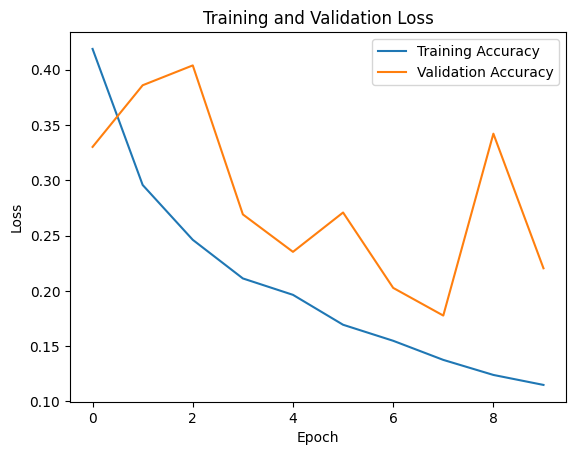

In [71]:
# Plot the training loss vs validation loss graph
plt.plot(train_loss, label='Training Accuracy')
plt.plot(val_loss, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#### Testing with Early Stopping

In [18]:
# Test the model and print the accuracy
test_acc = test_model(model, test_loader)

print(f"Test Accuracy with Early Stopping: {(test_acc['acc'] * 100):.2f}%")

Test Accuracy with Early Stopping: 88.40%


We see a slight decrease in accuracy with Early Stopping

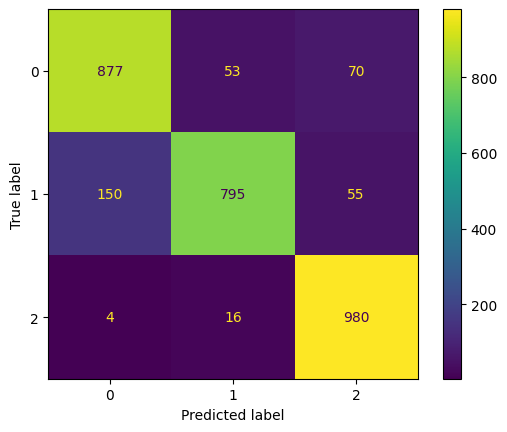

In [74]:
# Plot a confusion matrix

# Confusion matrix function 
confusion_matrix = metrics.confusion_matrix(test_acc['actual'], test_acc['predicted'])

# Convert the table into a confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Plot
cm_display.plot()
plt.show()

We can see that using the early stopping technique provides no improvement

### Adding more layers

In [195]:
class AlexNet2(nn.Module):
    def __init__(self, num_classes=3):
        super(AlexNet2, self).__init__()
        self.features = nn.Sequential(
            # Layer 1
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Layer 2
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            
            # Layer 3
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),

            # Layer 4
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),

            # Layer 5
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(),

            # Layer 6
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        # self.avgpool = nn.AdaptiveAvgPool2d((4, 4))
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            # FC 1
            nn.Dropout(0.5),
            nn.Linear(9216, 4096),
            nn.ReLU(),
            
            # FC 2
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(),

            # FC 3
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


#### Training with modified AlexNet 

In [208]:
print(f"==================================    Training with AlexNet2    ==================================")

# Set the hyperparameters
num_classes = 3
num_epochs = 10
learning_rate = 0.01

# Create an instance of the model
model2 = AlexNet2(num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate, momentum = 0.9)

# Create lists to store the loss and accuracy for plotting later
train_loss = list()
train_acc = list()
val_loss = list()
val_acc = list()
train_steps = len(train_loader)
val_steps = len(val_loader)

print(f"Device: {device}")
print(f"Batch Size: {batch_size}")
print(f"Learning Rate: {learning_rate}")
print(f"Epochs: {num_epochs}\n")

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    running_corrects = 0
    total = 0
    
    # Set the model to training mode
    model2.train()
    
    # Iterate over the training data
    for tidx, (images, labels) in enumerate(train_loader):
        
        # Move the inputs and labels to the GPU if available
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero-out the parameter gradients
        optimizer.zero_grad()
        
        # Perform forward pass
        outputs = model2(images)
        _, preds = torch.max(outputs, 1)    # reduce dimension to 1
        loss = criterion(outputs, labels)
        
        # Perform backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Calculate the running loss and the number of correct labels
        running_loss += loss.item() * images.size(0)
        running_corrects += torch.sum(preds == labels.data)
        total += images.size(0)
        
    # Calculate the training loss and accuracy
    epoch_loss = running_loss / len(train_data)
    epoch_acc = running_corrects.double() / len(train_data)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)
    
    # Set the model to evaluation mode
    model2.eval()
    
    # Turn off gradient computation for validation data
    with torch.no_grad():
        running_loss = 0.0
        running_corrects = 0
        total = 0
        
        for vidx, (images, labels) in enumerate(val_loader):
            
            # Mve the inputs and labels to the GPU if available
            images = images.to(device)
            labels = labels.to(device)
            
            # Perform forward pass
            outputs = model2(images)
            _, preds = torch.max(outputs, 1)    # reduce dimension to 1
            loss = criterion(outputs, labels)
            
            # Calculate the running loss and the number of correct labels
            running_loss += loss.item() * images.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total += images.size(0)
        
        # Calculate the validation loss and accuracy
        epoch_loss = running_loss / len(val_data)
        epoch_acc = running_corrects.double() / len(val_data)
        val_loss.append(epoch_loss)
        val_acc.append(epoch_acc)

    # Print the epoch number, steps, and losses and accuracies for training and validation
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Step [{tidx + 1}/{train_steps}], Validation Step [{vidx + 1}/{val_steps}]")
    print(f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Acc: {val_acc[-1]:.4f}\n")


==================================    Training with AlexNet2    ==================================
Device: cuda:0
Batch Size: 64
Learning Rate: 0.01
Epochs: 10

Epoch [1/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.4094, Train Acc: 0.8426, Val Loss: 0.7247, Val Acc: 0.6707

Epoch [2/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2871, Train Acc: 0.8935, Val Loss: 0.3138, Val Acc: 0.8713

Epoch [3/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2459, Train Acc: 0.9104, Val Loss: 0.2656, Val Acc: 0.8947

Epoch [4/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.2115, Train Acc: 0.9207, Val Loss: 0.2586, Val Acc: 0.9047

Epoch [5/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1882, Train Acc: 0.9316, Val Loss: 0.2961, Val Acc: 0.8847

Epoch [6/10], Train Step [375/375], Validation Step [47/47]
Train Loss: 0.1701, Train Acc: 0.9373, Val Loss: 0.2038, Val Acc: 0.9193

Epoch [7/10], Train Step [375/375],

#### Testing with modified AlexNet

In [210]:
test_result = test_model(model2, test_loader)

# Print the test accuracy
print(f"Test Accuracy with AlexNet2: {(test_result['acc'] * 100):.2f}%")

Test Accuracy with AlexNet2: 89.93%


The test accuracy on the modified AlexNet structure is almost identical to the test accuracy achieved with the standard structure

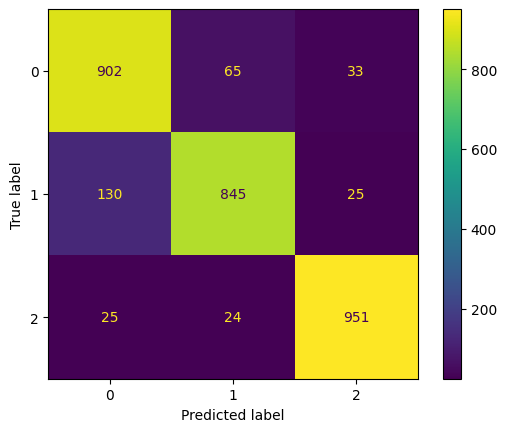

In [211]:
# Plot a confusion matrix

# Confusion matrix function 
confusion_matrix = metrics.confusion_matrix(test_result['actual'], test_result['predicted'])

# Convert the table into a confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Plot
cm_display.plot()
plt.show()

# Part 4

## Pre-processing

In [76]:
import torchvision
import torch.optim as optim

# Define the transforms for data augmentation on train set
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),      # Horizontally flip the given image randomly
    transforms.RandomRotation(degrees=10),          # Rotate the image by angle specified
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),    # Randomly change the brightness, contrast, saturation and hue of an image 
    # transforms.RandomAffine(translate=(0.1,0.1)),
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Define the transforms for test set
test_transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the SVHN train dataset
train_set = torchvision.datasets.SVHN(root='./SVHN_dataset', split='train', download=True, transform=train_transforms)

# Create a new dataset with the original and augmented images
duplicates = 2
train_set_augmented = torch.utils.data.ConcatDataset([train_set]*duplicates)

# Create a dataloader for the augmented dataset
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_set_augmented, batch_size=batch_size, shuffle=True, num_workers=2)

# Load the SVHN test dataset and create a dataloader
test_set = torchvision.datasets.SVHN(root='./data', split='test', download=True, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)


Using downloaded and verified file: ./SVHN_dataset\train_32x32.mat
Using downloaded and verified file: ./data\test_32x32.mat


In [79]:
train_steps = len(train_loader)

print(f"The SVHN train set has {len(train_set)} images")
print(f"The SVHN train set after augmentation has {len(train_set_augmented)} images")
print(f"The SVHN test set has {len(test_set)} images\n")

print(f"The training dataloader has {train_steps} batches of size {batch_size}")
print(f"The testing dataloader has {len(test_loader)} batches of size {batch_size}")

The SVHN train set has 73257 images
The SVHN train set after augmentation has 146514 images
The SVHN test set has 26032 images

The training dataloader has 2290 batches of size 64
The testing dataloader has 407 batches of size 64


## Training and Testing

In [87]:
# Set device as cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create an instance of the model
model = AlexNet(num_classes=10).to(device)

# Modify the last layer for 10 outputs (= number of classes)
model.classifier[6] = nn.Linear(4096, 10)

model = model.to(device)

# Set the loss and optimizer functions
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Initialize the lists to store the training and testing accuracy
train_acc_list = []
test_acc_list = []
num_epochs = 10

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    for idx, (images, labels) in enumerate(train_loader, 0):
        
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Compute the training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    with torch.no_grad():
        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted_test = torch.max(outputs.data, 1)

            test_total += labels.size(0)
            test_correct += (predicted_test == labels).sum().item()

    train_acc = train_correct / train_total
    test_acc = test_correct / test_total

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Step [{idx + 1}/{train_steps}]")
    print(f"Train Loss: {(running_loss / train_steps):.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Acc: {test_acc:.4f}\n")


print(f"Test Accuracy on the SVHN dataset: {(test_correct / test_total * 100):.2f}%")


Epoch [1/10], Train Step [2290/2290]
Train Loss: 1.1344, Train Acc: 0.6123
Test Acc: 0.8102

Epoch [2/10], Train Step [2290/2290]
Train Loss: 0.5178, Train Acc: 0.8347
Test Acc: 0.8615

Epoch [3/10], Train Step [2290/2290]
Train Loss: 0.4043, Train Acc: 0.8743
Test Acc: 0.9009

Epoch [4/10], Train Step [2290/2290]
Train Loss: 0.3499, Train Acc: 0.8917
Test Acc: 0.9092

Epoch [5/10], Train Step [2290/2290]
Train Loss: 0.3164, Train Acc: 0.9040
Test Acc: 0.9197

Epoch [6/10], Train Step [2290/2290]
Train Loss: 0.2913, Train Acc: 0.9118
Test Acc: 0.9190

Epoch [7/10], Train Step [2290/2290]
Train Loss: 0.2738, Train Acc: 0.9190
Test Acc: 0.9255

Epoch [8/10], Train Step [2290/2290]
Train Loss: 0.2603, Train Acc: 0.9223
Test Acc: 0.9281

Epoch [9/10], Train Step [2290/2290]
Train Loss: 0.2467, Train Acc: 0.9271
Test Acc: 0.9286

Epoch [10/10], Train Step [2290/2290]
Train Loss: 0.2352, Train Acc: 0.9302
Test Acc: 0.9290

Test Accuracy on the SVHN dataset: 92.90%


Test Accuracy on the SVHN dataset with learning rate = 0.001 is 92.90%


In [215]:
# Set device as cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create an instance of the model
model = AlexNet(num_classes=10).to(device)

# Modify the last layer for 10 outputs (= number of classes)
model.classifier[6] = nn.Linear(4096, 10)

model = model.to(device)

# Set the loss and optimizer functions
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Initialize the lists to store the training and testing accuracy
train_acc_list = []
test_acc_list = []
num_epochs = 10

# Train the model
for epoch in range(num_epochs):
    running_loss = 0.0
    train_correct = 0
    train_total = 0
    test_correct = 0
    test_total = 0

    for idx, (images, labels) in enumerate(train_loader, 0):
        
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Compute the training accuracy
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    
    # Create lists for predicted labels and true labels
    predicted_list = list()
    actual_list = list()

    # Calculate test accuracy
    with torch.no_grad():
        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted_test = torch.max(outputs.data, 1)

            test_total += labels.size(0)
            test_correct += (predicted_test == labels).sum().item()

            # Append the predicted and true labels to the lists
            # Since cuda:0 device type cannot be converted from tensor to numpy, we use Tensor.cpu() to copy the tensor to host memory first.
            predicted_list.extend(predicted_test.cpu().numpy())
            actual_list.extend(labels.cpu().numpy())

    train_acc = train_correct / train_total
    test_acc = test_correct / test_total

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    
    print(f"Epoch [{epoch + 1}/{num_epochs}], Train Step [{idx + 1}/{train_steps}]")
    print(f"Train Loss: {(running_loss / train_steps):.4f}, Train Acc: {train_acc:.4f}")
    print(f"Test Acc: {test_acc:.4f}\n")


print(f"Test Accuracy on the SVHN dataset: {(test_correct / test_total * 100):.2f}%")


Epoch [1/10], Train Step [375/375]
Train Loss: 0.4378, Train Acc: 0.8347
Test Acc: 0.7437

Epoch [2/10], Train Step [375/375]
Train Loss: 0.2910, Train Acc: 0.8915
Test Acc: 0.7830

Epoch [3/10], Train Step [375/375]
Train Loss: 0.2480, Train Acc: 0.9080
Test Acc: 0.8093

Epoch [4/10], Train Step [375/375]
Train Loss: 0.2156, Train Acc: 0.9199
Test Acc: 0.8423

Epoch [5/10], Train Step [375/375]
Train Loss: 0.1971, Train Acc: 0.9289
Test Acc: 0.8507

Epoch [6/10], Train Step [375/375]
Train Loss: 0.1836, Train Acc: 0.9337
Test Acc: 0.8373

Epoch [7/10], Train Step [375/375]
Train Loss: 0.1573, Train Acc: 0.9425
Test Acc: 0.8367

Epoch [8/10], Train Step [375/375]
Train Loss: 0.1466, Train Acc: 0.9468
Test Acc: 0.8490

Epoch [9/10], Train Step [375/375]
Train Loss: 0.1356, Train Acc: 0.9498
Test Acc: 0.8890

Epoch [10/10], Train Step [375/375]
Train Loss: 0.1187, Train Acc: 0.9570
Test Acc: 0.8640

Test Accuracy on the SVHN dataset: 86.40%


Test Accuracy on the SVHN dataset with learning rate = 0.01 is 86.40%


## Testing

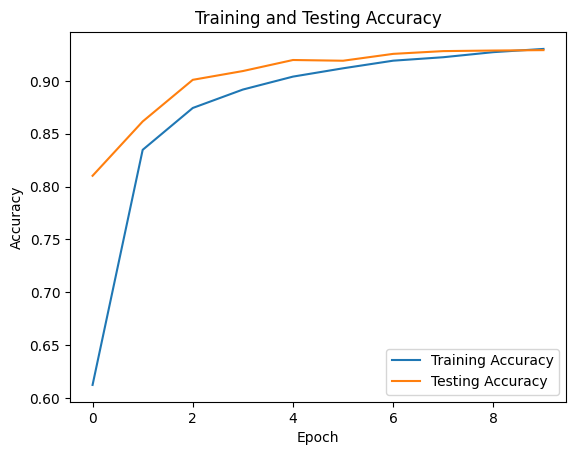

In [91]:
# Plot the training accuracy vs testing accuracy graph
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(test_acc_list, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

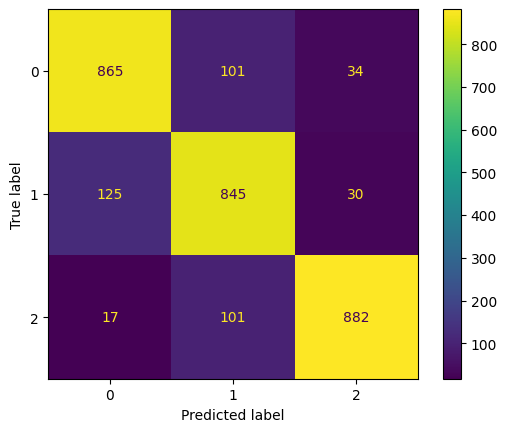

In [216]:
# Plot a confusion matrix

# Confusion matrix function 
confusion_matrix = metrics.confusion_matrix(actual_list, predicted_list)

# Convert the table into a confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# Plot
cm_display.plot()
plt.show()

# References

https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

https://pytorch.org/docs/stable/index.html

https://stackoverflow.com/

https://blog.paperspace.com/alexnet-pytorch/



I initially wrote a code with Keras and tensorflow and used the following references. But upon learning that cuda support for native Windows has been deprecated since December 2022, I switched to using PyTorch, where I already had experience with GPU integration.

https://towardsdatascience.com/installing-tensorflow-with-cuda-cudnn-and-gpu-support-on-windows-10-60693e46e781

https://www.youtube.com/watch?v=0S81koZpwPA&ab_channel=JeffHeaton